# General Datset and Gridcell Statistics

In [58]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import DataSetQuery
import datetime
import json
import MalardHelpers
import geopandas as gp
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
from pandas.io.json import json_normalize

In [40]:
environmentName = 'DEV'
parentDsName = 'mtngla'
dataSet = 'ReadyData4'
runName='TestRun4-Serial'
region = 'HMA'

#Sets the URL of the Malard ServiceGateway.
query = DataSetQuery.DataSetQuery('http://localhost:9000',environmentName)

bbx = query.getDataSetBoundingBox( parentDsName, dataSet)
bbx = json.loads(bbx)
minX=bbx['gridCellMinX']
maxX=bbx['gridCellMaxX']
minY=bbx['gridCellMinY']
maxY=bbx['gridCellMaxY']

#minX=-16000000
#maxX=1500000
#minY=-10000000
#maxY=900000
minT = datetime.datetime.utcfromtimestamp(bbx['minTime']/1000) # divide by 1000 because it is in milliseconds
maxT = datetime.datetime.utcfromtimestamp(bbx['maxTime']/1000+10000)
#print(bbx['minTime'])
#print(bbx['maxTime'])
#print(minT)
#print(maxT)
#maxT = datetime.datetime(2018, 12,31,0,0)

# Number of gridcells

In [41]:
cells = query.getGridCells(parentDsName,dataSet,minX,maxX,minY,maxY,minT,maxT)
cells = json.loads(cells)
print('Number of gridcells: ', len(cells))

Number of gridcells:  274


In [42]:
# get data
fileName = query.getNetCdfFile(parentDsName,dataSet,minX,maxX,minY,maxY,minT,maxT)
print('filename',fileName)

#Converts the NetCDF into a DataFrame.
df = MalardHelpers.getDataFrameFromNetCDF(fileName)

filename /data/puma1/scratch/malard/export/mtngla_ReadyData4_-1600000_1500000_-1000000_900000_1279234800000_1546214400000.nc


In [43]:
#3166232
#3166630
#1064537
print(df.shape)

(3166639, 24)


# Dataset Statistics: Mean and Std in whole dataset

In [62]:
# DATASET STATISTICS
pd.options.display.float_format = '{:20,.2f}'.format
print('MEAN: ---------------------')
print(df.mean())
print()
print('STD: ----------------------')
print(df.std())

MEAN: ---------------------
index                       679,750.75
lon                              83.60
lat                              34.69
elev                          5,614.19
heading                          92.59
demDiff                           0.55
demDiffMad                        7.17
demDiffMad2                       4.69
phaseAmb                         -0.01
meanDiffSpread                  470.37
wf_number                     2,223.35
sampleNb                        324.45
power                        24,474.36
powerdB                        -156.96
phase                             0.01
phaseS                             nan
phaseSSegment                      nan
phaseConfidence                    nan
coh                               0.91
x                          -117,461.93
y                          -124,987.53
time                  1,413,130,913.61
swathFileId                   5,847.03
dtype: float64

STD: ----------------------
index                       780

# Gridcell Statistics

In [45]:
# RUN STATISTICS
stats=query.getRunStatistics(parentDsName, runName)
stats = json.loads(stats)
dfStats = json_normalize(stats)
print('Columns: ',dfStats.columns)

#create new stats: area and point ratio
dfStats['statistics.points_per_sqkm']=dfStats['statistics.result_total']/dfStats['statistics.glacierMaskArea']

Columns:  Index(['gridCell.minX', 'gridCell.minY', 'gridCell.size',
       'statistics.afterDebrisMask', 'statistics.afterGlacierMask',
       'statistics.debrisMaskArea', 'statistics.glacierMaskArea',
       'statistics.joined_data', 'statistics.result_avgX',
       'statistics.result_avgY', 'statistics.result_count_2010',
       'statistics.result_count_2011', 'statistics.result_count_2012',
       'statistics.result_count_2013', 'statistics.result_count_2014',
       'statistics.result_count_2015', 'statistics.result_count_2016',
       'statistics.result_count_2017', 'statistics.result_count_2018',
       'statistics.result_offsetX', 'statistics.result_offsetY',
       'statistics.result_srtm', 'statistics.result_tandemx',
       'statistics.result_total', 'statistics.srtm_filtered',
       'statistics.srtm_not_in', 'statistics.tandemX_filtered'],
      dtype='object')


# Gridcell Statistics: Mean and Std of 100x100km squares

In [63]:
print('MEAN: ---------------------')
print(dfStats.mean())
print()
print('STD: ----------------------')
print(dfStats.std())

MEAN: ---------------------
gridCell.minX                            -58,029.20
gridCell.minY                           -187,226.28
gridCell.size                            100,000.00
statistics.afterDebrisMask                11,599.38
statistics.afterGlacierMask               12,127.20
statistics.debrisMaskArea                     37.24
statistics.glacierMaskArea                   344.70
statistics.joined_data                 1,131,396.30
statistics.result_avgX                    -8,583.29
statistics.result_avgY                  -136,099.36
statistics.result_count_2010                 440.88
statistics.result_count_2011               1,359.73
statistics.result_count_2012               1,442.11
statistics.result_count_2013               1,439.54
statistics.result_count_2014               1,418.45
statistics.result_count_2015               1,431.09
statistics.result_count_2016               1,405.01
statistics.result_count_2017               1,342.86
statistics.result_count_2018        

# Gridcell Statistics: General Stats

In [53]:
print('GENERAL STATS:')
print('Number of gridcells: ', dfStats['statistics.result_total'].count())
print('Total points in result dataset',dfStats['statistics.result_total'].sum())
debris=dfStats['statistics.afterGlacierMask'].sum()-dfStats['statistics.afterDebrisMask'].sum()
print('Total points removed by debris: ', debris)
#print('Total number of TandemX in resultset: ', dfStats['statistics.result_tandemx'].sum())
#print('Total number of SRTM in resultset: ', dfStats['statistics.result_srtm'].sum())
#total = dfStats['statistics.result_tandemx'].sum()+dfStats['statistics.result_srtm'].sum()
#print('Ratio: TandemX=%s percent , SRTM=%s percent'%(dfStats['statistics.result_tandemx'].sum()/total*100, dfStats['statistics.result_srtm'].sum()/total*100))
#print('Result Dataset was increased by SRTM: %s percent'% (dfStats['statistics.result_srtm'].sum()/dfStats['statistics.result_tandemx'].sum()*100))
print('Total number of TandemX in resultset: ', dfStats['statistics.result_srtm'].sum())
print('Total number of SRTM in resultset: ', dfStats['statistics.result_tandemx'].sum())
total = dfStats['statistics.result_tandemx'].sum()+dfStats['statistics.result_srtm'].sum()
print('Ratio: TandemX=%s percent , SRTM=%s percent'%(dfStats['statistics.result_srtm'].sum()/total*100, dfStats['statistics.result_tandemx'].sum()/total*100))
print('Result Dataset was increased by SRTM: %s percent'% (dfStats['statistics.result_tandemx'].sum()/dfStats['statistics.result_srtm'].sum()*100))


GENERAL STATS:
Number of gridcells:  274
Total points in result dataset 3166640
Total points removed by debris:  156222.0
Total number of TandemX in resultset:  2640125
Total number of SRTM in resultset:  526515
Ratio: TandemX=83.37307051006745 percent , SRTM=16.626929489932547 percent
Result Dataset was increased by SRTM: 19.94280573836466 percent


# Gridcell Statistics: To GeoData

In [65]:
#convert to geodataframe
crs = json.loads(query.getProjection(region))['proj4']

#geometry = [Point(xy) for xy in zip(dfStats['gridCell.minX'], dfStats['gridCell.minY'])]
geometry = []
for idx, line in dfStats.iterrows():
    minX,maxX=line['gridCell.minX'],line['gridCell.minX']+line['gridCell.size']
    minY,maxY=line['gridCell.minY'],line['gridCell.minY']+line['gridCell.size']
    geometry.append(Polygon([(minX,minY), (minX,maxY), (maxX,maxY), (maxX,minY), (minX,minY)]))
geoStats = gp.GeoDataFrame(dfStats, crs=crs, geometry=geometry)
#geoStats=geoStats.dropna()

# Gridcell Statistics: Total points and points per sqkm displayed

<IPython.core.display.Javascript object>


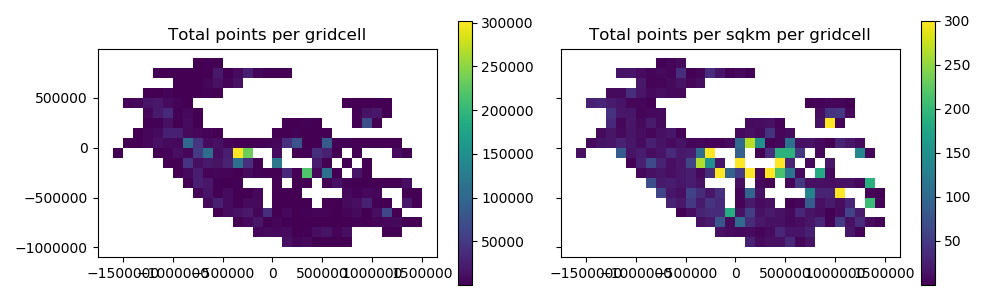

In [67]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3), sharex=True, sharey=True, tight_layout=True)

#geoStats.plot(column='statistics.afterDebrisMask', marker='.', markersize=5, legend=True)
geoStats.plot(ax= axs[0], column='statistics.result_total', markersize=5, legend=True)
geoStats.plot(ax= axs[1], column='statistics.points_per_sqkm', markersize=5, legend=True, vmax=300)
axs[0].set_title('Total points per gridcell')
axs[1].set_title('Total points per sqkm per gridcell')
plt.show()


In [49]:
# convert points to geo points
def toGeoData(data):
    # Convert points to geometries
    geometry = [Point(xy) for xy in zip(data.x, data.y)]
    geoData = gp.GeoDataFrame(data, crs=crs, geometry=geometry)
    return geoData

geoDf = toGeoData(df)



In [50]:
# read glaciers
pathM = "/data/puma1/scratch/mtngla/masks/himalayas/glacier-outlines/13_14_15_rgi60_Himalayas_mask.shp"
glaciers = gp.read_file(pathM)

# Full Dataset displayed (elevation)

<IPython.core.display.Javascript object>


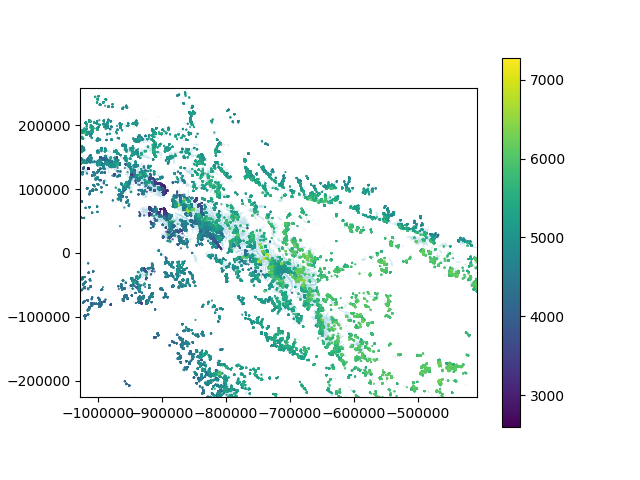

In [64]:
# plot ploints
base = glaciers.plot(facecolor='lightblue')
geoDf.plot(ax=base, column='elev', marker='.', markersize=1, legend=True)